<a href="https://colab.research.google.com/github/KieuSonTung/Data_Preparation/blob/main/Data_Preparation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
plt.style.use('seaborn')

## Load the dateset

In [29]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/car train.csv', sep=';')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/car test.csv', sep=';')
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


## Overview

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


Now we are dropping those null rows

In [31]:
train = train.dropna()
train = train.reset_index(drop=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


We are modifying some fields 

## Mileage

In [32]:
train['mileage_unit'] = train['mileage'].apply(lambda x: x.split()[1])
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_unit
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,kmpl
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,kmpl
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,kmpl
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,kmpl
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,kmpl


In [33]:
train.mileage_unit.value_counts()

kmpl     5774
km/kg      66
Name: mileage_unit, dtype: int64

We can see that some observations have different measuring units, so we have to convert them 

In [34]:
train['new_mileage'] = train['mileage'].apply(lambda x: float(x.split()[0]) if str(x).endswith('kmpl') else float(x.split()[0]) * 1.4) 
train[train['mileage'].str.contains('km/kg')].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_unit,new_mileage
164,Maruti Wagon R LXI DUO BSIII,2010,200000,40000,LPG,Individual,Manual,Fourth & Above Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,km/kg,24.220
172,Hyundai EON LPG Era Plus,2012,222000,120000,LPG,Individual,Manual,First Owner,21.1 km/kg,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0,km/kg,29.540
345,Hyundai Santro Xing GLS LPG,2010,200000,80000,LPG,Individual,Manual,Second Owner,13.45 km/kg,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,km/kg,18.830
440,Maruti Alto K10 LXI CNG,2019,430000,20000,CNG,Individual,Manual,First Owner,32.26 km/kg,998 CC,58.3 bhp,78Nm@ 3500rpm,4.0,km/kg,45.164
444,Maruti Eeco CNG HTR 5-STR,2016,330000,47370,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,63 bhp,83Nm@ 3000rpm,5.0,km/kg,30.716


In [35]:
train.drop(columns=['mileage_unit', 'mileage'], inplace=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,new_mileage
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,21.50
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,21.19
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0,12.55
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0,17.01
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,1969 CC,190 bhp,400Nm,5.0,18.00


## Engine

In [36]:
train['engine_unit'] = train['engine'].apply(lambda x: x.split()[1])
train['engine_unit'].value_counts()

CC    5840
Name: engine_unit, dtype: int64

All the observations has the same measuring unit. Nice!

In [37]:
train['new_engine'] = train['engine'].apply(lambda x: float(x.split()[0]))
train.drop(columns='engine', inplace=True)
train.drop(columns='engine_unit', inplace=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,new_mileage,new_engine
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,108.5 bhp,260Nm@ 1500-2750rpm,5.0,21.50,1497.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,88.76 bhp,219.66nm@ 1500-2750rpm,5.0,21.19,1396.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,168.5 bhp,360Nm@ 1400-3200rpm,7.0,12.55,2982.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,121.3 bhp,154.9Nm@ 4200rpm,5.0,17.01,1591.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,190 bhp,400Nm,5.0,18.00,1969.0


## Max_power

In [38]:
train['max_power_unit'] = train['max_power'].apply(lambda x: x.split()[1])
train['max_power_unit'].value_counts()

bhp    5840
Name: max_power_unit, dtype: int64

In [39]:
train['new_max_power'] = train['max_power'].apply(lambda x: float(x.split()[0]))
train.drop(columns=['max_power', 'max_power_unit'], inplace=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,new_mileage,new_engine,new_max_power
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,260Nm@ 1500-2750rpm,5.0,21.50,1497.0,108.50
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,219.66nm@ 1500-2750rpm,5.0,21.19,1396.0,88.76
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,360Nm@ 1400-3200rpm,7.0,12.55,2982.0,168.50
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,154.9Nm@ 4200rpm,5.0,17.01,1591.0,121.30
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,400Nm,5.0,18.00,1969.0,190.00


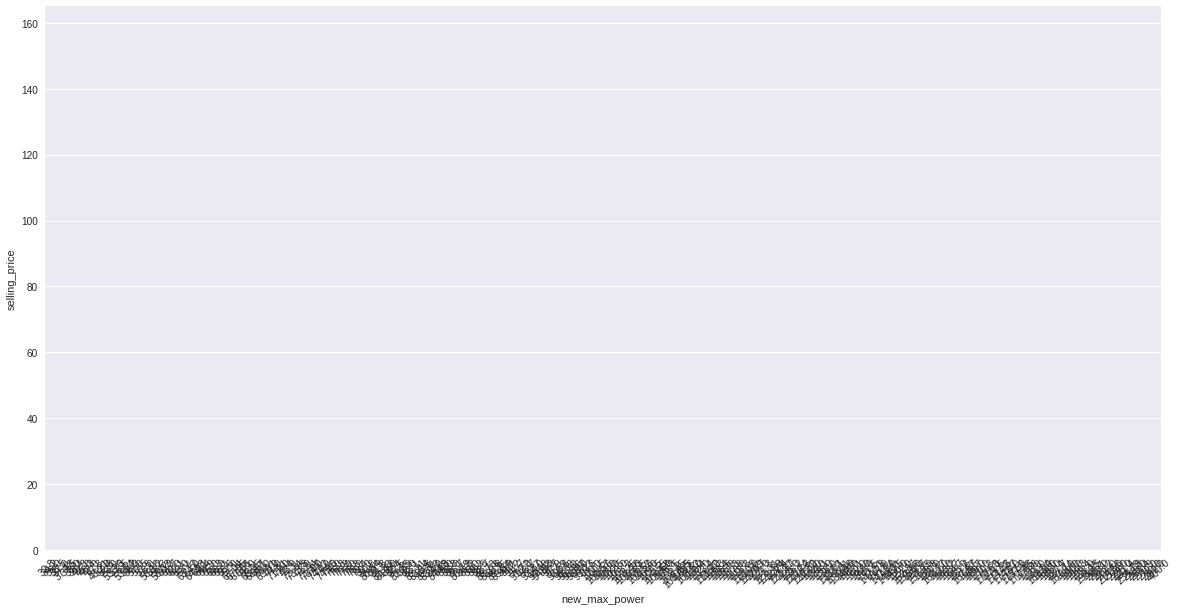

In [45]:
# Max power/ Price

data = pd.concat([train['new_max_power'], train['selling_price']], axis=1)

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x='new_max_power', y='selling_price', data=data)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax.axis(ymin=0, ymax=165)
plt.show()

## Torque

In [ ]:
a = np.array(train['torque'].apply(lambda x: x.split()[0]))
for i in a:
    print(i)


Since there are a lot of variations and some observations don't have measuring unit so we are going to drop **torque** column

In [41]:
train.drop(columns='torque', inplace=True)
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,new_mileage,new_engine,new_max_power
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,5.0,21.50,1497.0,108.50
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,5.0,21.19,1396.0,88.76
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,7.0,12.55,2982.0,168.50
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,5.0,17.01,1591.0,121.30
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,5.0,18.00,1969.0,190.00
